In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import mglearn
import warnings

warnings.filterwarnings('ignore') 
plt.style.use('classic')

# K-means

### 1. 랜덤하게 데이터 포인트 할당
### 2. 가장 가까운 데이터 포인트로 클러스터 구성
### 3. 클러스터의 중심 위치에 데이터 포인트 할당. -> 데이터 포인트에 변화가 있으면 2번으로 이동해서 반복

### K-means 알고리즘은 거리를 기반으로 한다.
### 따라서 원형 형태의 클러스터만을 인식할 수 있다.

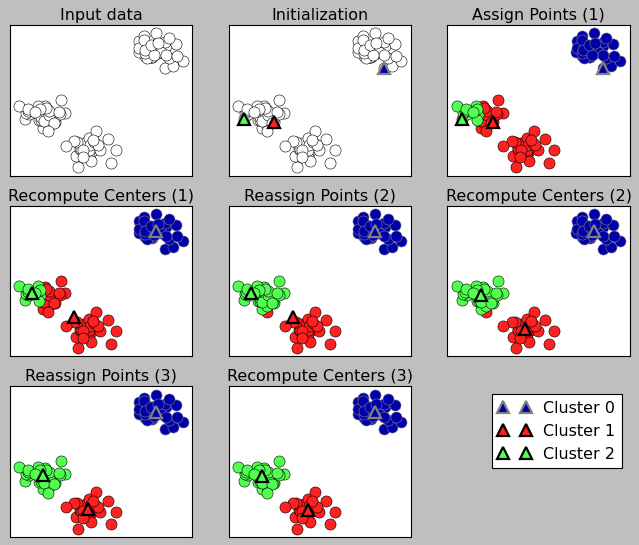

In [2]:
mglearn.plots.plot_kmeans_algorithm()

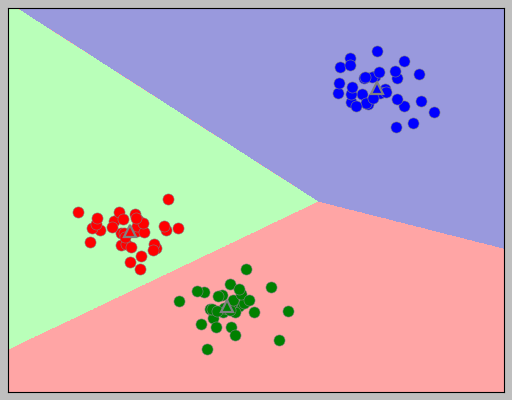

In [3]:
mglearn.plots.plot_kmeans_boundaries()

In [4]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

X,y = make_blobs(random_state=1)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [6]:
print("cluster label : \n", kmeans.labels_)

cluster label : 
 [0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]


In [7]:
# 예측은 가장 가까운 포인트로 출력함.

# 훈련데이터에 대해서는 label과 predict가 같음
print(kmeans.predict(X))

[0 1 1 1 2 2 2 1 0 0 1 1 2 0 2 2 2 0 1 1 2 1 2 0 1 2 2 0 0 2 0 0 2 0 1 2 1
 1 1 2 2 1 0 1 1 2 0 0 0 0 1 2 2 2 0 2 1 1 0 0 1 2 2 1 1 2 0 2 0 1 1 1 2 0
 0 1 2 2 0 1 0 1 1 2 0 0 0 0 1 0 2 0 0 1 1 2 2 0 2 0]


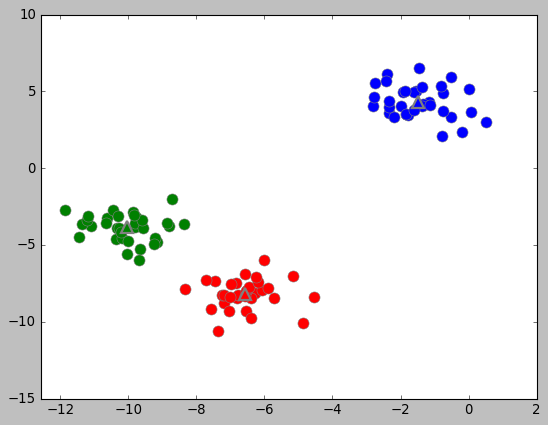

In [8]:
#cluster_centers_에 클래스 순서별로 데이터 포인트가 저장되어 있다.
mglearn.discrete_scatter(X[:,0],X[:,1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], [0,1,2], markers='^',
                         markeredgewidth=2)

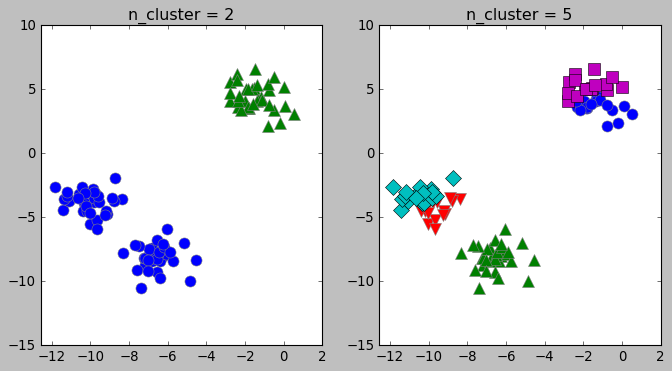

In [9]:
# 클러스트 수를 변경했을 경우
fig, axes = plt.subplots(1,2,figsize = (10,5))
n_clusters = [2,5]
for ax,n in zip(axes, n_clusters)  :
    kmeans = KMeans(n_clusters=n)
    kmeans.fit(X)
    mglearn.discrete_scatter(X[:,0], X[:,1], kmeans.labels_, ax=ax)
    ax.set_title(f"n_cluster = {n}")

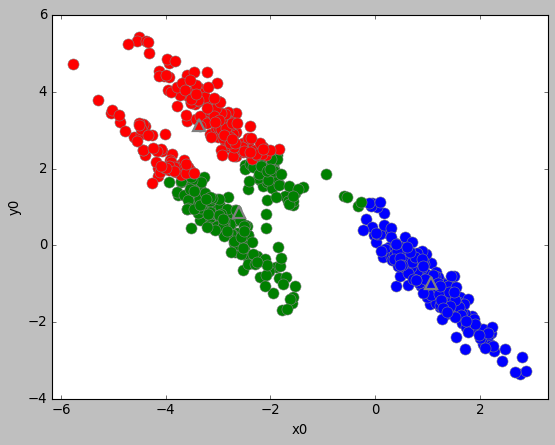

In [29]:
# 원형으로 클러스터를 구분하므로 제대로 인식하지 못한다.

X,y = make_blobs(random_state=170, n_samples=600)
rng = np.random.RandomState(74)

transformation = rng.normal(size=(2,2))
X = np.dot(X, transformation)

kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_pred = kmeans.predict(X)

mglearn.discrete_scatter(X[:,0], X[:,1], kmeans.labels_, markers='o')
mglearn.discrete_scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], [0,1,2],
                         markers='^', markeredgewidth=2)
plt.xlabel('x0')
plt.ylabel('y0')
plt.show()

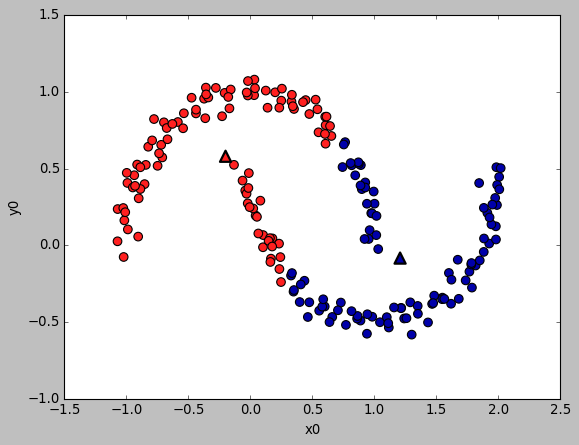

In [35]:
from sklearn.datasets import make_moons
X,y = make_moons(n_samples=200, noise=0.05, random_state=0)

kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_pred = kmeans.predict(X)

plt.scatter(X[:,0], X[:,1], c=y_pred, cmap = mglearn.cm2, s=60, edgecolors='k')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1],
            marker='^', c=[mglearn.cm2(0), mglearn.cm2(1)], s=100, linewidths=2,
            edgecolors='k')
plt.xlabel('x0')
plt.ylabel('y0')
plt.show()